In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn. model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
root = "dataset/csv/all_sensors.csv"

df = pd.read_csv(root, index_col=0)

In [3]:
print(df.shape)

(4458029, 13)


In [4]:
print(df.keys())

Index(['TANK_FILTER_OUT_PRESSURE', 'PT-203', 'TANK_LEVEL', 'FT-204B',
       'MAIN_FILTER_OUT_PRESSURE', 'MAIN_FILTER_IN_PRESSURE',
       'OIL_RETURN_TEMPERATURE', 'MAIN_FILTER_OIL_TEMP', 'FT-202B', 'PT-204',
       'TANK_TEMPERATURE', 'TANK_FILTER_IN_PRESSURE', 'LEVEL_all'],
      dtype='object')


In [5]:
print(df.head(5))

                     TANK_FILTER_OUT_PRESSURE    PT-203  TANK_LEVEL   FT-204B  \
time                                                                            
2017-05-01 00:00:00                       NaN  1.391037         NaN       NaN   
2017-05-01 00:00:01                       NaN       NaN         NaN       NaN   
2017-05-01 00:00:05                       NaN       NaN         NaN       NaN   
2017-05-01 00:00:06                       NaN       NaN         NaN  0.449163   
2017-05-01 00:00:07                       NaN       NaN         NaN       NaN   

                     MAIN_FILTER_OUT_PRESSURE  MAIN_FILTER_IN_PRESSURE  \
time                                                                     
2017-05-01 00:00:00                       NaN                      NaN   
2017-05-01 00:00:01                       NaN                      NaN   
2017-05-01 00:00:05                       NaN                      NaN   
2017-05-01 00:00:06                       NaN                 

In [6]:
df.describe()

,TANK_FILTER_OUT_PRESSURE,PT-203,TANK_LEVEL,FT-204B,MAIN_FILTER_OUT_PRESSURE,MAIN_FILTER_IN_PRESSURE,OIL_RETURN_TEMPERATURE,MAIN_FILTER_OIL_TEMP,FT-202B,PT-204,TANK_TEMPERATURE,TANK_FILTER_IN_PRESSURE,LEVEL_all
count,2376.000000,1.807101e+06,4236.000000,824926.000000,2361.000000,173034.000000,4754.000000,3045.000000,778973.000000,845048.000000,5485.000000,2454.000000,4236.000000
mean,0.039186,7.607229e-01,17.728116,0.466966,3.221822,93.186883,124.278792,127.824111,0.851519,0.465151,126.447947,0.195501,17.728116
std,0.110531,3.904457e-01,3.995448,0.082809,19.624127,7.871050,10.138733,11.797253,0.439919,0.082583,11.970123,1.696639,3.995448
min,0.000000,2.079147e-02,0.000000,0.029993,0.000000,0.000000,0.000000,12.954074,0.144697,0.025678,0.000000,0.000000,0.000000
25%,0.026757,4.014546e-01,18.060715,0.422250,0.004053,91.585045,116.982361,119.551125,0.542111,0.418787,118.844070,0.000000,18.060715
50%,0.026757,7.230804e-01,18.514532,0.472587,0.044595,94.950050,124.545929,127.692009,0.728679,0.473345,127.179565,0.000000,18.514532
75%,0.026757,1.047244e+00,19.068760,0.519846,0.044595,97.313675,132.239227,136.857819,1.090044,0.515971,135.313965,0.002432,19.068760
max,2.118740,4.640920e+00,21.899063,0.832715,132.727371,128.839355,149.928650,153.522324,3.100364,0.844660,157.621948,27.139824,21.899063


In [7]:
df.index = pd.to_datetime(df.index)

df = df.resample("H").mean()

In [8]:
df = df.ffill().bfill()

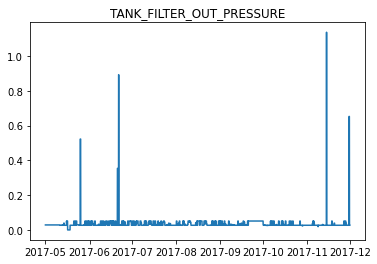

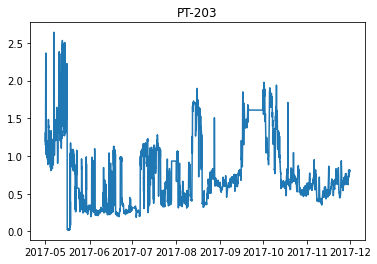

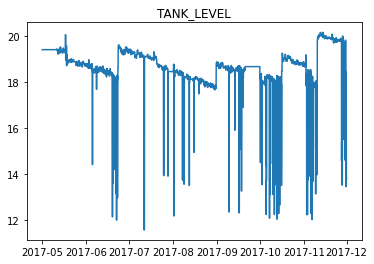

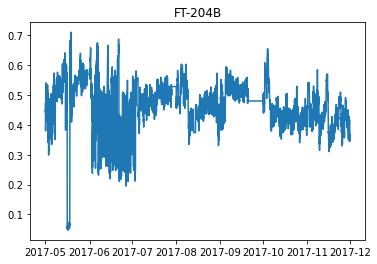

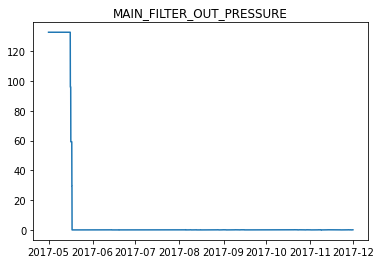

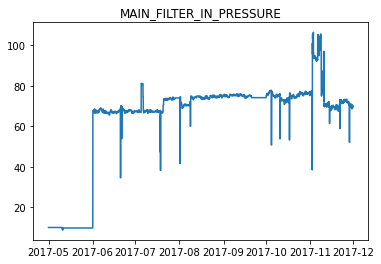

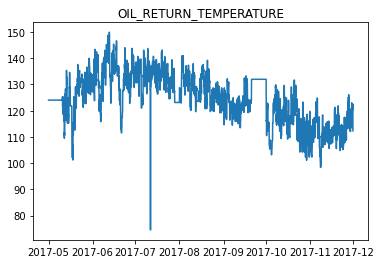

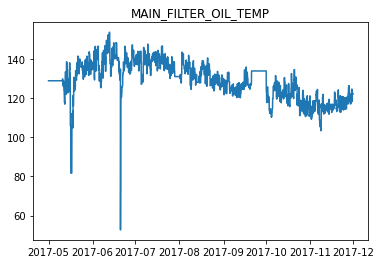

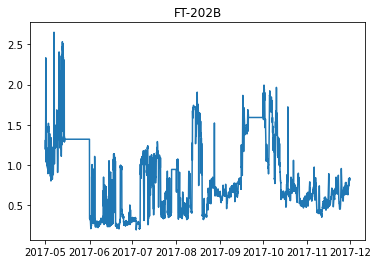

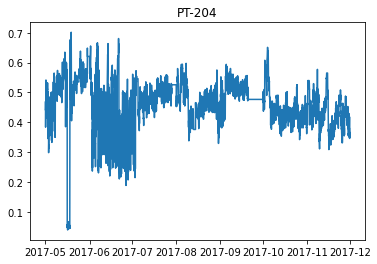

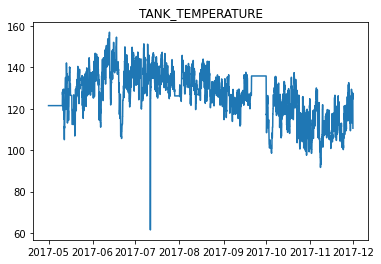

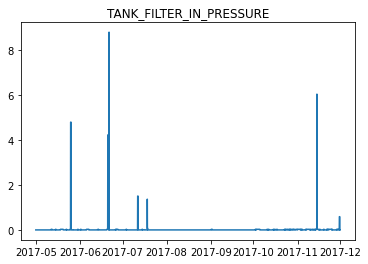

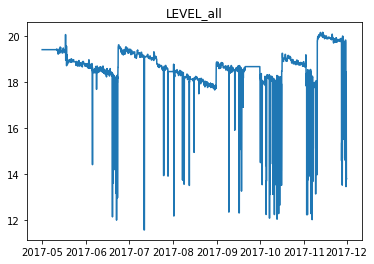

In [9]:
for col in df.columns:
    fig = plt.Figure()
    plt.plot(df.index,df[col])
    plt.title(col)
    plt.show()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f8dc64643d0>,
      dtype=object)

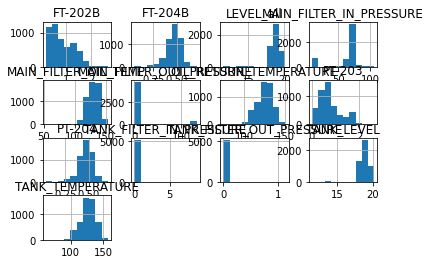

In [10]:
df.hist()

In [11]:
cor = df.corr()
cor.style.background_gradient(cmap="coolwarm")
cor
#plt.matshow(df.corr())
#plt.xlabel

,TANK_FILTER_OUT_PRESSURE,PT-203,TANK_LEVEL,FT-204B,MAIN_FILTER_OUT_PRESSURE,MAIN_FILTER_IN_PRESSURE,OIL_RETURN_TEMPERATURE,MAIN_FILTER_OIL_TEMP,FT-202B,PT-204,TANK_TEMPERATURE,TANK_FILTER_IN_PRESSURE,LEVEL_all
TANK_FILTER_OUT_PRESSURE,1.000000,-0.012857,-0.038950,0.078350,-0.047536,-0.008229,0.054208,0.035802,-0.006392,0.078238,0.040592,0.811984,-0.038950
PT-203,-0.012857,1.000000,-0.064757,0.163103,0.352966,-0.108158,0.002578,0.007583,0.866333,0.160823,0.014136,-0.060203,-0.064757
TANK_LEVEL,-0.038950,-0.064757,1.000000,-0.043984,0.206474,-0.254739,0.052791,0.025603,-0.033930,-0.043863,0.016917,-0.047906,1.000000
FT-204B,0.078350,0.163103,-0.043984,1.000000,0.082711,-0.157407,0.049264,0.178344,0.157230,0.997656,-0.029533,0.117499,-0.043984
MAIN_FILTER_OUT_PRESSURE,-0.047536,0.352966,0.206474,0.082711,1.000000,-0.667828,-0.040023,-0.052970,0.325036,0.080926,-0.095852,-0.022797,0.206474
MAIN_FILTER_IN_PRESSURE,-0.008229,-0.108158,-0.254739,-0.157407,-0.667828,1.000000,-0.128036,-0.128838,-0.405632,-0.162052,-0.061274,-0.052211,-0.254739
OIL_RETURN_TEMPERATURE,0.054208,0.002578,0.052791,0.049264,-0.040023,-0.128036,1.000000,0.896544,0.023421,0.049230,0.957608,-0.073055,0.052791
MAIN_FILTER_OIL_TEMP,0.035802,0.007583,0.025603,0.178344,-0.052970,-0.128838,0.896544,1.000000,-0.004737,0.179146,0.856594,-0.074106,0.025603
FT-202B,-0.006392,0.866333,-0.033930,0.157230,0.325036,-0.405632,0.023421,-0.004737,1.000000,0.160021,0.033017,-0.030697,-0.033930
PT-204,0.078238,0.160823,-0.043863,0.997656,0.080926,-0.162052,0.049230,0.179146,0.160021,1.000000,-0.029469,0.115466,-0.043863


In [12]:
## Normlalization
df_norm = (df - df.min()) / (df.max() - df.min())
df_norm.describe()


,TANK_FILTER_OUT_PRESSURE,PT-203,TANK_LEVEL,FT-204B,MAIN_FILTER_OUT_PRESSURE,MAIN_FILTER_IN_PRESSURE,OIL_RETURN_TEMPERATURE,MAIN_FILTER_OIL_TEMP,FT-202B,PT-204,TANK_TEMPERATURE,TANK_FILTER_IN_PRESSURE,LEVEL_all
count,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000,5136.000000
mean,0.031893,0.288498,0.818098,0.628994,0.074510,0.561784,0.665912,0.756226,0.265410,0.639750,0.683178,0.003588,0.818098
std,0.041973,0.175215,0.127365,0.126448,0.259726,0.235746,0.125137,0.096087,0.185264,0.126527,0.117098,0.042429,0.127365
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.023554,0.148617,0.788462,0.561717,0.000031,0.598610,0.585176,0.689711,0.122606,0.573527,0.615319,0.000000,0.788462
50%,0.023554,0.242148,0.826106,0.649073,0.000336,0.650695,0.662601,0.759014,0.213358,0.660138,0.685960,0.000000,0.826106
75%,0.034261,0.384465,0.879898,0.713591,0.000336,0.675721,0.762048,0.825100,0.425732,0.722666,0.778787,0.000000,0.879898
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [16]:
#LSTM
np_oil = df_norm["OIL_RETURN_TEMPERATURE"].values
window_size=11

np_oil = np_oil[:-(np_oil.shape[0]%window_size)]
np_oil = np_oil.reshape((-1,window_size))
X = np_oil[:,:-1]
y = np_oil[:,-1]

In [21]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=False)

In [23]:
y_train

array([0.65657855, 0.65657855, 0.65657855, 0.65657855, 0.65657855,
       0.65657855, 0.65657855, 0.65657855, 0.65657855, 0.65657855,
       0.65657855, 0.65657855, 0.65657855, 0.65657855, 0.65657855,
       0.65657855, 0.65657855, 0.65657855, 0.65657855, 0.65657855,
       0.65657855, 0.66466513, 0.59369247, 0.57416425, 0.55842125,
       0.71344275, 0.6090053 , 0.73649793, 0.56057191, 0.62771633,
       0.56908861, 0.71955073, 0.6808382 , 0.62939386, 0.6260388 ,
       0.39393687, 0.36675224, 0.48065242, 0.6217375 , 0.5350218 ,
       0.56143225, 0.682989  , 0.71524933, 0.73735817, 0.83680588,
       0.70079664, 0.74673521, 0.75860708, 0.74630509, 0.74630509,
       0.74630509, 0.69658134, 0.6693536 , 0.63786761, 0.72032497,
       0.79095351, 0.66562864, 0.72759421, 0.7526711 , 0.74673521,
       0.77899554, 0.84274196, 0.82493432, 0.73563769, 0.79344823,
       0.7862899 , 0.75181086, 0.78415719, 0.70165688, 0.76368262,
       0.81555707, 0.80876115, 0.88016393, 0.84876384, 0.79662

In [19]:
!pip install numpy

Looking in indexes: https://debian-forge1-nexus.dev.fastnet.int/repository/pypi/simple


In [50]:
# Regression y = Oil return temperature
y = df_norm["OIL_RETURN_TEMPERATURE"].values
X = df_norm.loc[ : , df_norm.columns != "OIL_RETURN_TEMPERATURE"].values
dates = df_norm.index.values

# Split dataset
X_train,X_test,y_train,y_test,dates_train,dates_test = train_test_split(X,y,dates,test_size=0.2,shuffle=False)


In [51]:
X_test

array([[0.02355404, 0.22341523, 0.86738004, ..., 0.596536  , 0.        ,
        0.86738004],
       [0.02355404, 0.235965  , 0.86738004, ..., 0.58442234, 0.        ,
        0.86738004],
       [0.02355404, 0.23289567, 0.86738004, ..., 0.63182259, 0.        ,
        0.86738004],
       ...,
       [0.02355404, 0.30039838, 0.25833241, ..., 0.68732148, 0.        ,
        0.25833241],
       [0.02355404, 0.29473385, 0.25833241, ..., 0.59585556, 0.        ,
        0.25833241],
       [0.02355404, 0.29431634, 0.25833241, ..., 0.51446173, 0.        ,
        0.25833241]])

In [58]:
linear_regressor = LinearRegression()  # create object for the class
linear_regressor.fit(X_train, y_train)  # perform linear regression
y_pred = linear_regressor.predict(X_test)  # make predictions

In [59]:
linear_regressor.score(X_test,y_test)

0.7898597758190927

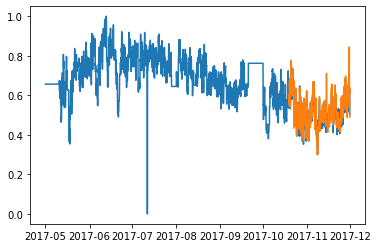

In [62]:
fig = plt.Figure()

plt.plot(dates, y)
plt.plot(dates_test, y_pred)

In [ ]:
#LSTM